In [6]:
import numpy as np
import keras
import pickle as pk
import matplotlib.pyplot as plt
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import UpSampling2D, Input
from keras.models import Model
import json

In [2]:
# Define model
inp = Input(shape=(32, 32, 3), name='image_input')
x = UpSampling2D(size =(7,7))(inp)
vgg = VGG16(weights='imagenet')

vgg.layers.pop()
vgg.outputs = [vgg.layers[-1].output]
vgg.layers[-1].outbound_nodes = []
vgg.summary()
output = vgg(x)

model = Model(inputs=inp, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
# Function to load a batch into memory
def load_batch(data_dir, batch_id):
    with open(os.path.join(data_dir, 'data_batch_%i' % batch_id), mode='rb') as file:
        batch = pk.load(file, encoding='latin1')
    feats = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    lbls = batch['labels']
    return feats, lbls

# Load the first batch
feats, labels = load_batch('cifar10', 1)
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Label Id: 6 - Class: frog


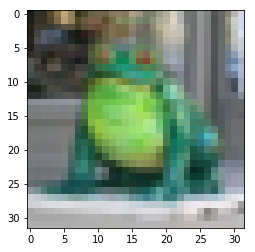

In [4]:
# Visualize images
sample_id = 19
sample_img = feats[sample_id]
sample_lbl = labels[sample_id]
print('Label Id: {} - Class: {}'.format(sample_lbl, label_names[sample_lbl]))
plt.imshow(sample_img)

In [5]:
sample_size = 3000
sample_feats = feats[:sample_size,:,:,:]
sample_labels = labels[:sample_size]

In [ ]:
import time

start = time.time()
embeddings = model.predict(feats[:sample_size,:,:,:])
with open(f'embeddings/embeddings_vgg16_{sample_size}.json', 'w') as outfile:
    json.dump(embeddings.tolist(), outfile)
print(time.time()-start)